In [45]:
import pyodbc
import pandas as pd
import csv
from bokeh.io import push_notebook, show, output_notebook
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
import matplotlib.animation as animation
from matplotlib.figure import Figure
from sklearn.cluster import KMeans
import matplotlib.pylab as pylab
from ipywidgets import interact
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from sklearn  import datasets
from random import randint
import matplotlib as mpl
import seaborn as sns

import numpy as np
import matplotlib
import warnings
import string
import numpy

import os

In [46]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-8NPN7QSF\SQLEXPRESS01;'
                      'Database=Coffie_prices;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

coffie = pd.read_sql_query('select * from dbo.Coffie_prices2020',conn)
print(coffie)
print(type(coffie))


           Date Close_Last Volume    Open    High     Low
0    12/31/2020     1.2825    N/A  1.2825  1.2825  1.2825
1    12/29/2020      1.254    N/A   1.254   1.254   1.254
2    12/28/2020     1.2335    N/A  1.2335  1.2335  1.2335
3    12/24/2020     1.2595    N/A  1.2595  1.2595  1.2595
4    12/23/2020     1.2455    N/A  1.2455  1.2455  1.2455
..          ...        ...    ...     ...     ...     ...
231  01/28/2020     1.0505    N/A  1.0505  1.0505  1.0505
232  01/27/2020      1.066    N/A   1.066   1.066   1.066
233  01/24/2020     1.1015    N/A  1.1015  1.1015  1.1015
234  01/23/2020      1.126    N/A   1.126   1.126   1.126
235  01/22/2020       1.11    N/A    1.11    1.11    1.11

[236 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>


In [47]:
print(coffie.columns)

Index(['Date', 'Close_Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')


In [48]:
coffie.describe()

,Date,Close_Last,Volume,Open,High,Low
count,236,236,236,236,236,236
unique,236,197,2,197,197,197
top,05/07/2020,0.9815,N/A,0.9815,0.9815,0.9815
freq,1,4,235,4,4,4


In [49]:
print(coffie.head(5))

         Date Close_Last Volume    Open    High     Low
0  12/31/2020     1.2825    N/A  1.2825  1.2825  1.2825
1  12/29/2020      1.254    N/A   1.254   1.254   1.254
2  12/28/2020     1.2335    N/A  1.2335  1.2335  1.2335
3  12/24/2020     1.2595    N/A  1.2595  1.2595  1.2595
4  12/23/2020     1.2455    N/A  1.2455  1.2455  1.2455


In [50]:
coffie = coffie.drop(columns='Volume')

print(coffie)

           Date Close_Last    Open    High     Low
0    12/31/2020     1.2825  1.2825  1.2825  1.2825
1    12/29/2020      1.254   1.254   1.254   1.254
2    12/28/2020     1.2335  1.2335  1.2335  1.2335
3    12/24/2020     1.2595  1.2595  1.2595  1.2595
4    12/23/2020     1.2455  1.2455  1.2455  1.2455
..          ...        ...     ...     ...     ...
231  01/28/2020     1.0505  1.0505  1.0505  1.0505
232  01/27/2020      1.066   1.066   1.066   1.066
233  01/24/2020     1.1015  1.1015  1.1015  1.1015
234  01/23/2020      1.126   1.126   1.126   1.126
235  01/22/2020       1.11    1.11    1.11    1.11

[236 rows x 5 columns]


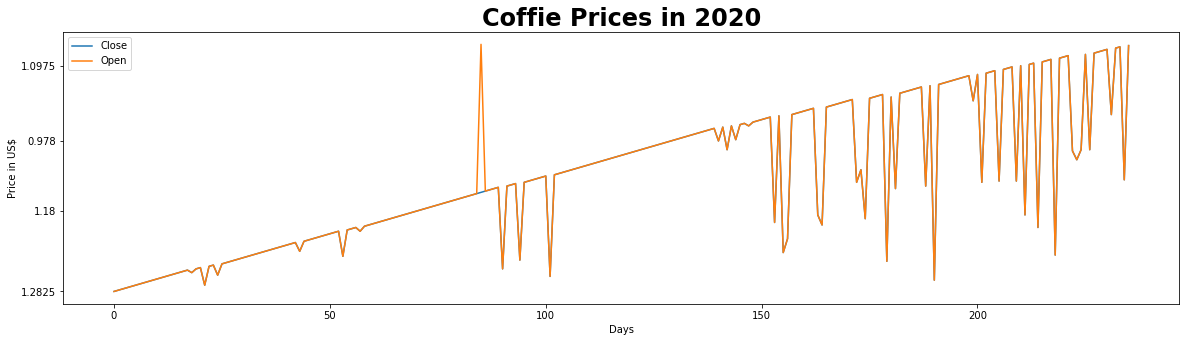

In [62]:
plt.figure(figsize=(20,5))

plt.title(('Coffie Prices in 2020'), fontdict={'fontweight':'bold', 'fontsize':24})

plt.plot(coffie['Close_Last'], label=('Close'))
plt.plot(coffie['Open'], label=('Open'))

plt.legend()
plt.xlabel('Days')
plt.ylabel('Price in US$')
plt.yticks(coffie.Open[::70])
plt.show()